### Import Library

In [34]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Atur dataset

In [35]:
dataset_path = '../../data/raw'

# Augmentasi
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.5, 1.5],
    validation_split=0.2
)

# Untuk training dan validasi
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 873 images belonging to 6 classes.


Found 216 images belonging to 6 classes.


### Bangun model

In [36]:
# Buat model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(6, activation='softmax'))

### Compile model

In [37]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


### Train model

In [38]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
28/28 [==============================] - 16s 520ms/step - loss: 1.7585 - accuracy: 0.2635 - val_loss: 1.6171 - val_accuracy: 0.3611
Epoch 2/20
28/28 [==============================] - 14s 497ms/step - loss: 1.4478 - accuracy: 0.4467 - val_loss: 1.5529 - val_accuracy: 0.4074
Epoch 3/20
28/28 [==============================] - 14s 494ms/step - loss: 1.2382 - accuracy: 0.5704 - val_loss: 1.3712 - val_accuracy: 0.5231
Epoch 4/20
28/28 [==============================] - 14s 496ms/step - loss: 1.0752 - accuracy: 0.6025 - val_loss: 1.3049 - val_accuracy: 0.5370
Epoch 5/20
28/28 [==============================] - 15s 536ms/step - loss: 0.9204 - accuracy: 0.6838 - val_loss: 1.3703 - val_accuracy: 0.5694
Epoch 6/20
28/28 [==============================] - 14s 513ms/step - loss: 0.8618 - accuracy: 0.7010 - val_loss: 1.2911 - val_accuracy: 0.5417
Epoch 7/20
28/28 [==============================] - ETA: 0s - loss: 0.7800 - accuracy: 0.7262

### Visualisasi

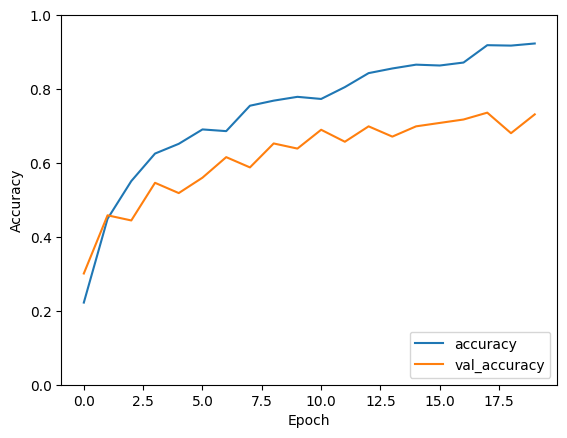

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()